# Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there 
and producing cars locally to give competition to their US and European counterparts.

We need to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
3. They want to create a linear model which quantitatively relates car prices with the variables
2. How well those variables describe the price of a car

## Business Goal: 

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Steps we follow

1. Reading, understanding and visualising the data
2. Preparing the data for modelling (Train-Test split, rescaling etc)
3. Building the model
4. Residual Analysis
5. Prediction and evaluation of the Test Set

### Step1: Reading and understanding the data

Lets first import Numpy and Pandas and read the CarPrice dataset

In [757]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [758]:
# Read the dataset
carprice = pd.read_csv('CarPrice_Assignment.csv')
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [759]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [760]:
# Droping columns of no use to analysis and converting all the column names to lower case

carprice = carprice.drop(['car_ID'], axis = 1)
cols = carprice.columns.str.lower()
carprice.columns = cols

carprice.columns

Index(['symboling', 'carname', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [761]:
# Checking the duplicate values

duplicate = carprice[carprice.duplicated()]
duplicate

,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [762]:
# As symboling is a categorical variable so changing the dtype to object

carprice['symboling'] = carprice['symboling'].astype(object)

In [763]:
carprice.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


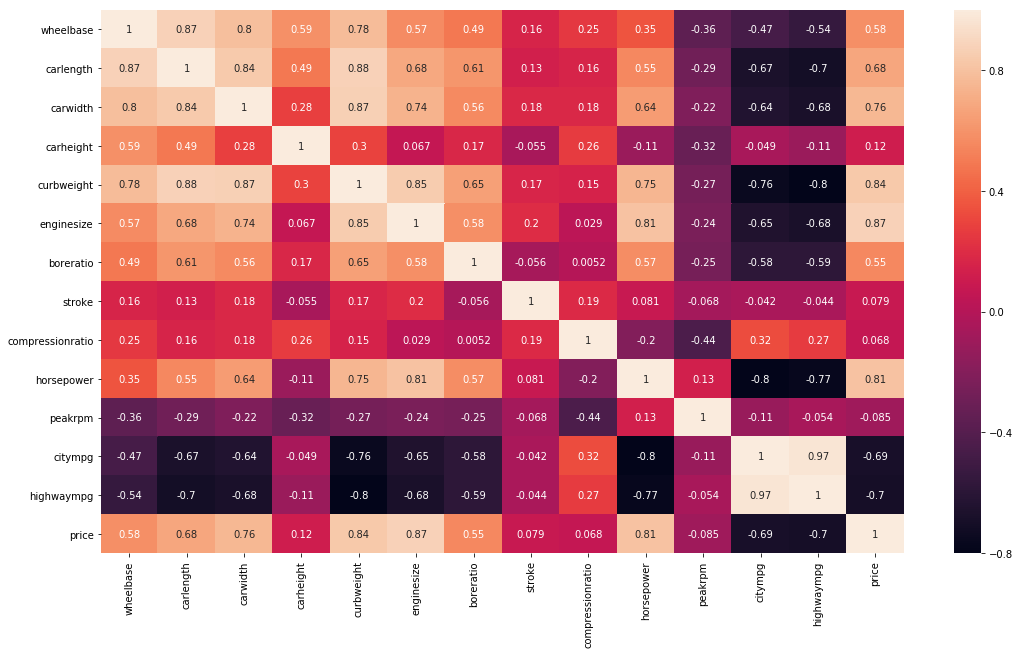

In [764]:
plt.figure(figsize=(18,10))
sns.heatmap(carprice.corr(method = 'pearson'), annot = True)

As there are so many independent variables which are positively correlated with price we can go ahead with the linear regression

In [765]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null object
carname             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg     

In [766]:
# Cleaning the data in carname column and deriving a column based on the car brand name

carprice['carname'] = carprice.carname.str.replace('maxda', 'mazda')
carprice['carname'] = carprice.carname.str.replace('Nissan', 'nissan')
carprice['carname'] = carprice.carname.str.replace('porcshce', 'porsche')
carprice['carname'] = carprice.carname.str.replace('toyouta', 'toyota')
carprice['carname'] = carprice.carname.str.replace('vokswagen', 'volkswagen')
carprice['carname'] = carprice.carname.str.replace('vw', 'volkswagen')

carprice.carname = carprice.carname.str.split(' ').str[0]

carprice.carname.unique()
carprice.carname.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: carname, dtype: int64

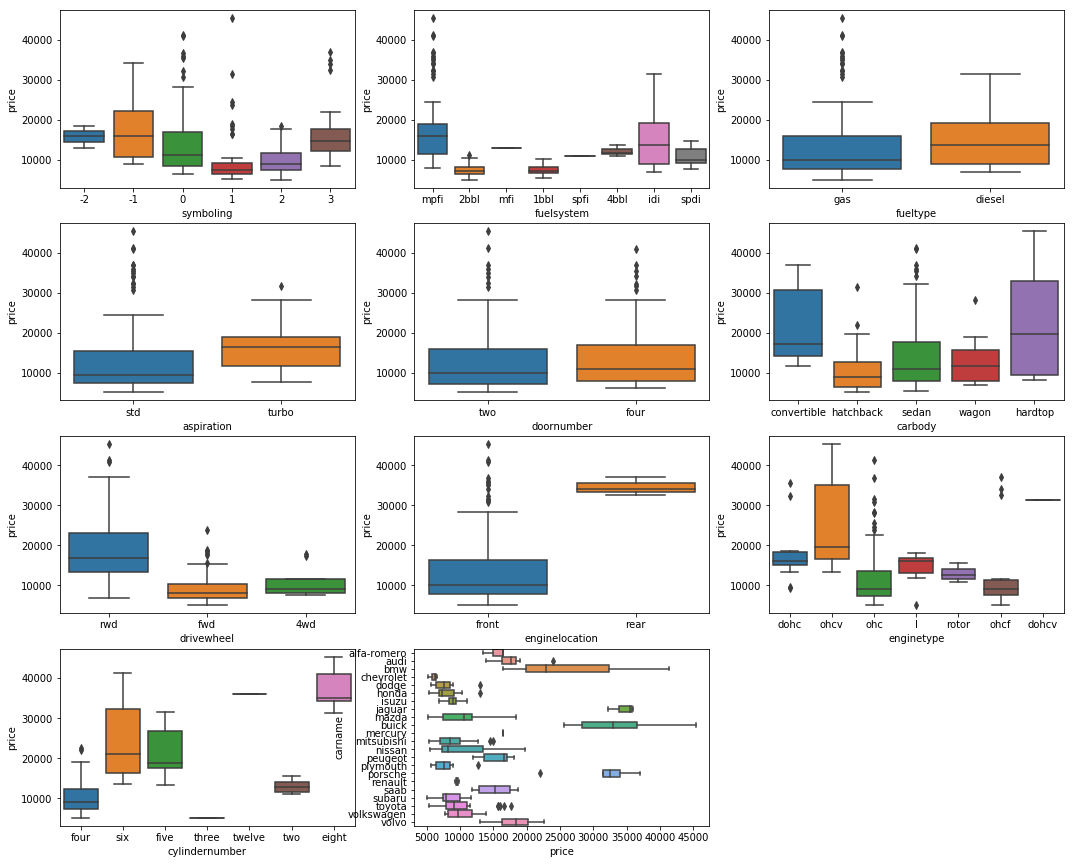

In [767]:
# Visualising categorical variables symboling, carname, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, 
# enginetype, cylindernumber, fuelsystem

plt.figure(figsize = (18,15))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(4,3,2)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.subplot(4,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(4,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(4,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(4,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(4,3,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(4,3,9)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(4,3,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(4,3,11)
sns.boxplot(x = 'price', y = 'carname', data = carprice)
plt.show()

### 2. Preparing the data for modelling

- Encoding
    - converting binary variables yes or no to 1/0
    - rest all to dummy variables
    - splitting of the data to train and test
    - Rescaling of variables

In [768]:
# variables carname, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, 
# enginetype, cylindernumber, fuelsystem

carprice.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

### Dummy variables

In [769]:
# creating dummy variables for non ordered categorical variables & binary variables for ordered categorical variables
# Creating dummy variables for car name, car body, drivewheel

carname_dummy = pd.get_dummies(carprice['carname'], prefix='carname_', drop_first = True)
carbody_dummy = pd.get_dummies(carprice['carbody'], prefix='carbody_', drop_first = True)
drivewheel_dummy = pd.get_dummies(carprice['drivewheel'], prefix='drivewheel_', drop_first = True)
cylindernumber_dummy = pd.get_dummies(carprice['cylindernumber'], prefix='cylinder_', drop_first = True)
symboling_dummy = pd.get_dummies(carprice['symboling'], prefix='symboling_', drop_first = True)
fuelsystem_dummy = pd.get_dummies(carprice['fuelsystem'], prefix='fuelsystem_', drop_first = True)
fueltype_dummy = pd.get_dummies(carprice['fueltype'], prefix='fueltype_', drop_first = True)
aspiration_dummy = pd.get_dummies(carprice['aspiration'], prefix='aspiration_', drop_first = True)
doornumber_dummy = pd.get_dummies(carprice['doornumber'], prefix='doornumber_', drop_first = True)
enginelocation_dummy = pd.get_dummies(carprice['enginelocation'], prefix='enginelocation_', drop_first = True)
enginetype_dummy = pd.get_dummies(carprice['enginetype'], prefix='enginetype_', drop_first = True)

carprice = pd.concat([carprice, carname_dummy, carbody_dummy, drivewheel_dummy, cylindernumber_dummy, 
                      symboling_dummy, fuelsystem_dummy, enginetype_dummy, fueltype_dummy, aspiration_dummy,
                     doornumber_dummy, enginelocation_dummy], axis = 1)
carprice.head()

,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype__dohcv,enginetype__l,enginetype__ohc,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,fueltype__gas,aspiration__turbo,doornumber__two,enginelocation__rear
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,1,0,1,0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,1,0,1,0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,1,0,1,0,1,0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,1,0,0,0,1,0,0,0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,1,0,0,0,1,0,0,0


In [770]:
carprice = carprice.drop(['carname', 'carbody', 'drivewheel', 'cylindernumber', 'symboling', 'fuelsystem', 
                          'enginetype', 'fueltype', 'aspiration', 'doornumber', 'enginelocation'], axis = 1)

In [771]:
carprice.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype__dohcv,enginetype__l,enginetype__ohc,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,fueltype__gas,aspiration__turbo,doornumber__two,enginelocation__rear
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,1,0,1,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,1,0,1,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,1,0,1,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,1,0,0,0,1,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,1,0,0,0,1,0,0,0


In [772]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
wheelbase               205 non-null float64
carlength               205 non-null float64
carwidth                205 non-null float64
carheight               205 non-null float64
curbweight              205 non-null int64
enginesize              205 non-null int64
boreratio               205 non-null float64
stroke                  205 non-null float64
compressionratio        205 non-null float64
horsepower              205 non-null int64
peakrpm                 205 non-null int64
citympg                 205 non-null int64
highwaympg              205 non-null int64
price                   205 non-null float64
carname__audi           205 non-null uint8
carname__bmw            205 non-null uint8
carname__buick          205 non-null uint8
carname__chevrolet      205 non-null uint8
carname__dodge          205 non-null uint8
carname__honda          205 non-null uint8
carname__isuzu     

### Splitting into train and test

In [773]:
df_train, df_test = train_test_split(carprice, train_size = 0.7, random_state = 10)

print(df_train.shape)
print(df_test.shape)

(143, 69)
(62, 69)


### Rescaling of the dataframe

In [774]:
# creating a scalar object and performing Min Max scaling/normalisation

scalar = MinMaxScaler()

num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype__dohcv,enginetype__l,enginetype__ohc,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,fueltype__gas,aspiration__turbo,doornumber__two,enginelocation__rear
43,0.224490,0.441791,0.128205,0.427273,0.329325,0.202429,0.550000,0.552381,0.093750,0.188679,...,0,0,1,0,0,0,1,0,0,0
78,0.206997,0.241791,0.350427,0.181818,0.200155,0.125506,0.307143,0.552381,0.150000,0.125786,...,0,0,1,0,0,0,1,0,1,0
143,0.309038,0.461194,0.435897,0.336364,0.330489,0.190283,0.771429,0.271429,0.125000,0.289308,...,0,0,0,1,0,0,1,0,0,0
21,0.206997,0.241791,0.299145,0.181818,0.150504,0.117409,0.307143,0.552381,0.150625,0.125786,...,0,0,1,0,0,0,1,0,1,0
128,0.084548,0.414925,0.401709,0.254545,0.508922,0.538462,0.857143,0.395238,0.156250,1.000000,...,0,0,0,1,0,0,1,0,1,1


In [775]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype__dohcv,enginetype__l,enginetype__ohc,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,fueltype__gas,aspiration__turbo,doornumber__two,enginelocation__rear
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.345654,0.477455,0.459088,0.456643,0.394731,0.253220,0.551149,0.551931,0.178199,0.335620,...,0.0,0.055944,0.748252,0.083916,0.048951,0.006993,0.923077,0.174825,0.412587,0.013986
std,0.173896,0.188913,0.171908,0.216789,0.192184,0.159618,0.195440,0.150656,0.227941,0.231324,...,0.0,0.230621,0.435543,0.278236,0.216524,0.083624,0.267406,0.381153,0.494030,0.117845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230321,0.376119,0.316239,0.290909,0.247091,0.145749,0.375000,0.485714,0.093750,0.138365,...,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.300292,0.467164,0.435897,0.481818,0.354926,0.198381,0.521429,0.571429,0.125000,0.289308,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.425656,0.583582,0.529915,0.627273,0.524438,0.311741,0.742857,0.633333,0.150000,0.427673,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [776]:
# dividing x and y sets for model building

y_train = df_train.pop('price')
X_train = df_train

### 3. Building the model

In [777]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [778]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [779]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 25),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 41),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 32),
 ('stroke', False, 10),
 ('compressionratio', False, 16),
 ('horsepower', True, 1),
 ('peakrpm', False, 13),
 ('citympg', False, 54),
 ('highwaympg', True, 1),
 ('carname__audi', False, 5),
 ('carname__bmw', True, 1),
 ('carname__buick', True, 1),
 ('carname__chevrolet', False, 29),
 ('carname__dodge', False, 51),
 ('carname__honda', False, 40),
 ('carname__isuzu', False, 20),
 ('carname__jaguar', True, 1),
 ('carname__mazda', False, 35),
 ('carname__mercury', False, 55),
 ('carname__mitsubishi', False, 19),
 ('carname__nissan', False, 39),
 ('carname__peugeot', False, 17),
 ('carname__plymouth', False, 50),
 ('carname__porsche', True, 1),
 ('carname__renault', False, 57),
 ('carname__saab', False, 23),
 ('carname__subaru', False, 11),
 ('carname__toyota', False, 47),
 ('carname__volkswagen', False, 46),


In [780]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'highwaympg',
       'carname__bmw', 'carname__buick', 'carname__jaguar', 'carname__porsche',
       'enginelocation__rear'],
      dtype='object')

In [781]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'carname__audi',
       'carname__chevrolet', 'carname__dodge', 'carname__honda',
       'carname__isuzu', 'carname__mazda', 'carname__mercury',
       'carname__mitsubishi', 'carname__nissan', 'carname__peugeot',
       'carname__plymouth', 'carname__renault', 'carname__saab',
       'carname__subaru', 'carname__toyota', 'carname__volkswagen',
       'carname__volvo', 'carbody__hardtop', 'carbody__hatchback',
       'carbody__sedan', 'carbody__wagon', 'drivewheel__fwd',
       'drivewheel__rwd', 'cylinder__five', 'cylinder__four', 'cylinder__six',
       'cylinder__three', 'cylinder__twelve', 'cylinder__two', 'symboling__-1',
       'symboling__0', 'symboling__1', 'symboling__2', 'symboling__3',
       'fuelsystem__2bbl', 'fuelsystem__4bbl', 'fuelsystem__idi',
       'fuelsystem__mfi', 'fuelsystem__mpfi', 'fuelsystem__spdi',
       'fuelsystem__spfi', 'enginetype__dohc

In [782]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [783]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [784]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [785]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     176.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.09e-71
Time:                        20:54:05   Log-Likelihood:                 220.05
No. Observations:                 143   AIC:                            -418.1
Df Residuals:                     132   BIC:                            -385.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1777 

In [786]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,42.08
0,carwidth,38.91
2,enginesize,31.11
3,horsepower,17.01
4,highwaympg,3.95
9,enginelocation__rear,3.41
8,carname__porsche,3.14
6,carname__buick,2.44
5,carname__bmw,1.42
7,carname__jaguar,1.32


In [787]:
X_train_new = X_train_rfe.drop(['highwaympg'], axis = 1)

In [788]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [789]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [790]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     193.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.74e-72
Time:                        20:54:06   Log-Likelihood:                 218.66
No. Observations:                 143   AIC:                            -417.3
Df Residuals:                     133   BIC:                            -387.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1191 

In [791]:
#X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,39.02
2,enginesize,28.93
0,carwidth,25.71
3,horsepower,14.11
8,enginelocation__rear,3.31
7,carname__porsche,3.12
5,carname__buick,1.95
4,carname__bmw,1.41
6,carname__jaguar,1.29


In [792]:
X_train_new = X_train_new.drop(['enginesize'], axis = 1)

In [793]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [794]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [795]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     210.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.18e-72
Time:                        20:54:06   Log-Likelihood:                 216.17
No. Observations:                 143   AIC:                            -414.3
Df Residuals:                     134   BIC:                            -387.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1127 

In [796]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,35.65
0,carwidth,24.44
2,horsepower,10.90
7,enginelocation__rear,3.25
6,carname__porsche,3.12
3,carname__bmw,1.23
4,carname__buick,1.15
5,carname__jaguar,1.13


In [797]:
X_train_new = X_train_new.drop(['carwidth'], axis = 1)

In [798]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [799]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [800]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     212.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.16e-69
Time:                        20:54:07   Log-Likelihood:                 207.46
No. Observations:                 143   AIC:                            -398.9
Df Residuals:                     135   BIC:                            -375.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0728 

In [801]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,10.89
0,curbweight,10.00
6,enginelocation__rear,3.15
5,carname__porsche,3.08
2,carname__bmw,1.16
3,carname__buick,1.15
4,carname__jaguar,1.05


In [802]:
X_train_new = X_train_new.drop(['horsepower'], axis = 1)

In [803]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [804]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [805]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     193.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.36e-64
Time:                        20:54:08   Log-Likelihood:                 190.74
No. Observations:                 143   AIC:                            -367.5
Df Residuals:                     136   BIC:                            -346.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0817 

In [806]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,carname__porsche,3.04
5,enginelocation__rear,3.00
0,curbweight,1.35
2,carname__buick,1.15
1,carname__bmw,1.12
3,carname__jaguar,1.05


In [807]:
X_train_new.columns

Index(['curbweight', 'carname__bmw', 'carname__buick', 'carname__jaguar',
       'carname__porsche', 'enginelocation__rear'],
      dtype='object')

### Step 4: Residual Analysis

In [808]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

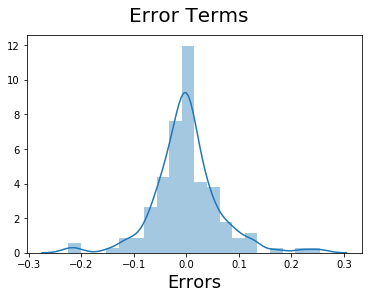

In [809]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Predictions and evaluation on the test set

In [810]:
# scaling the variables as done on the train set

num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_vars] = scalar.transform(df_test[num_vars])

In [811]:
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype__dohcv,enginetype__l,enginetype__ohc,enginetype__ohcf,enginetype__ohcv,enginetype__rotor,fueltype__gas,aspiration__turbo,doornumber__two,enginelocation__rear
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.374636,0.524819,0.525917,0.427126,0.458795,0.298224,0.594009,0.593433,0.238407,0.392879,...,0.016129,0.064516,0.661290,0.048387,0.096774,0.048387,0.854839,0.193548,0.500000,0.016129
std,0.179129,0.169487,0.201159,0.234525,0.218016,0.185235,0.186936,0.143247,0.287377,0.282783,...,0.127000,0.247676,0.477134,0.216335,0.298064,0.216335,0.355139,0.398304,0.504082,0.127000
min,0.058309,0.220896,0.282051,-0.090909,0.149728,0.036437,0.100000,0.271429,0.000000,0.050314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253644,0.413806,0.350427,0.263636,0.315361,0.149798,0.464286,0.514286,0.106250,0.216981,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.306122,0.515672,0.512821,0.427273,0.393910,0.263158,0.607143,0.580952,0.131250,0.320755,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000
75%,0.460641,0.645149,0.651709,0.579545,0.607254,0.368421,0.748214,0.677381,0.154688,0.471698,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,0.845481,0.917910,1.025641,0.936364,1.000000,1.072874,1.000000,1.000000,1.000000,1.509434,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [812]:
y_test = df_test.pop('price')
X_test = df_test

In [813]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [814]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

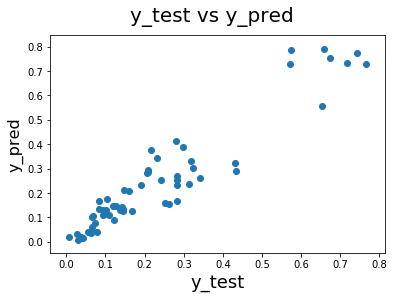

In [815]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [816]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.872974698153079

### Conclusion: 

We can see that the equation of our best fitted line is as below:

𝑝𝑟𝑖𝑐𝑒 = -0.0817*const + 0.6062*curbweight + 0.2805*carname__bmw + 0.3371*carname__buick + 0.2310*carname__jaguar + 0.1979*carname__porsche + 0.3168*enginelocation__rear

As per the above equation the price of the car is mostly related to the curbweight. Also we have engine location to be rear & carname like BMW, Buick, porsche and Jaguar contrbuting arround 0.2 to 0.3 times increase in the price.

Overall we have a decent model with r2 of 0.895 which means I am able to explain 89.5% variance in the price of the car
also I was able to get 87.3% on test set.